# Low frequency content biases spectral slope only for long windows

Scott

Based on Figure 1 of paper saying that low frequencies may contribute to 1/f slope

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

# Load data

In [2]:
x = np.load('./exampledata.npy')
Fs = 1000.
t = np.arange(0,len(x)/Fs,1/Fs)

# Functions for calculating PSD

In [3]:
def f_psd(x, Fs, method,
        Hzmed=0, welch_params={'window':'hanning','nperseg':1000,'noverlap':None}):
    '''
    Calculate the power spectrum of a signal
    
    Parameters
    ----------
    x : array
        temporal signal
    Fs : integer
        sampling rate
    method : str in ['fftmed','welch']
        Method for calculating PSD
    Hzmed : float
        relevant if method == 'fftmed'
        Frequency width of the median filter
    welch_params : dict
        relevant if method == 'welch'
        Parameters to sp.signal.welch
        
    Returns
    -------
    f : array
        frequencies corresponding to the PSD output
    psd : array
        power spectrum
    '''
    
    if method == 'fftmed':
        # Calculate frequencies
        N = len(x)
        f = np.arange(0,Fs/2,Fs/N)
        
        # Calculate PSD
        rawfft = np.fft.fft(x)
        psd = np.abs(rawfft[:len(f)])**2
    
        # Median filter
        if Hzmed > 0:
            sampmed = np.argmin(np.abs(f-Hzmed/2.0))
            psd = signal.medfilt(psd,sampmed*2+1)
            
    elif method == 'welch':
        f, psd = sp.signal.welch(x, fs=Fs, **welch_params)
        
    else:
        raise ValueError('input for PSD method not recognized')
    
    return f, psd

# A low frequency oscillation biases spectral slope (Fig 1A)

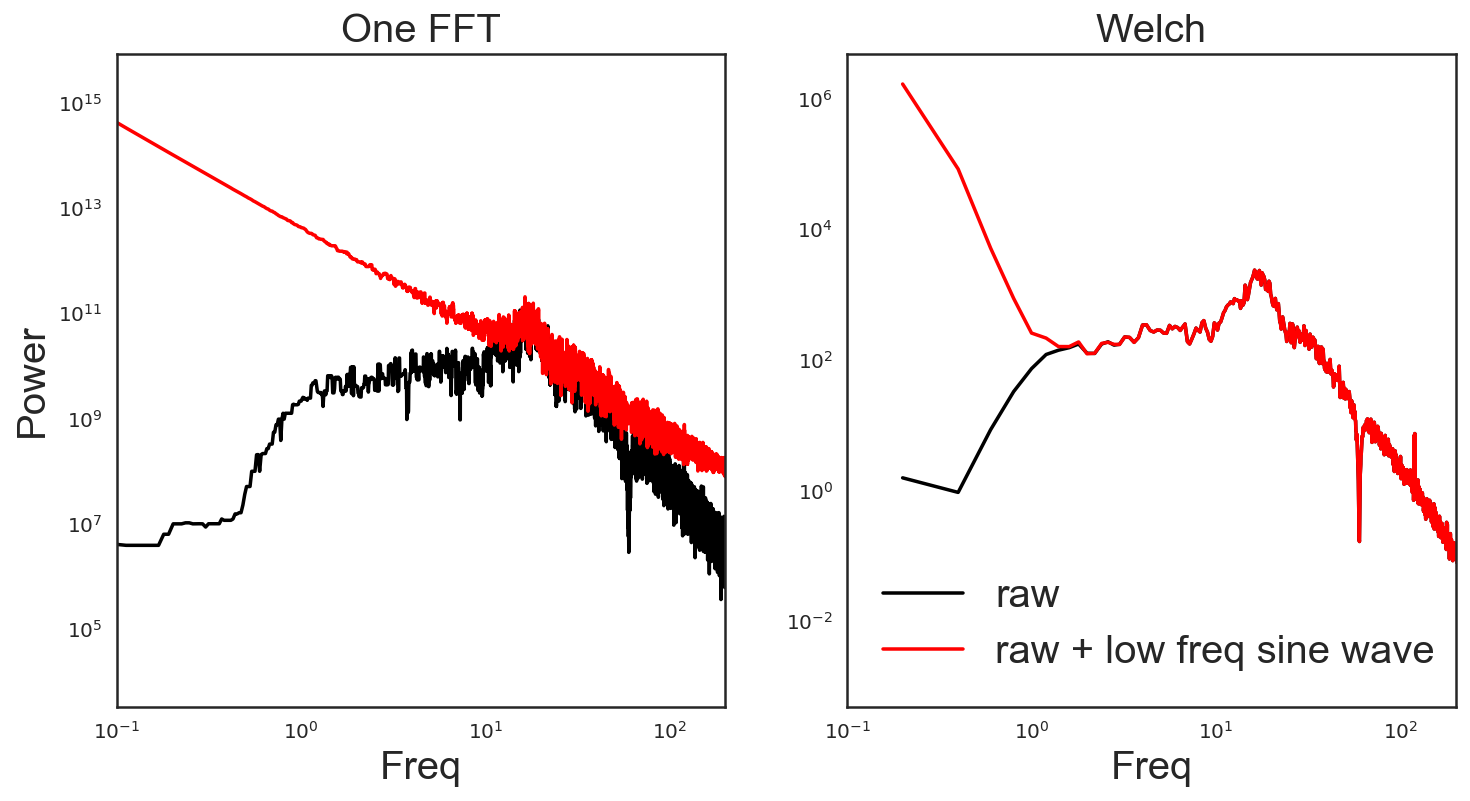

In [4]:
# Add low freq oscillation
x2 = x + 20000*np.sin(t*2*np.pi*.01)

# Calculate both power spectra with single Fourier Transform (median filter the result with window size of 0.1Hz)
f,psd = f_psd(x,Fs=Fs,method='fftmed', Hzmed = .1)
f2,psd2 = f_psd(x2,Fs=Fs,method='fftmed', Hzmed = .1)

# Calculate both power spectra using Welch's method, Window size = 5 sec
f3,psd3 = f_psd(x,Fs=Fs,method='welch',welch_params={'nperseg':5000})
f4,psd4 = f_psd(x2,Fs=Fs,method='welch',welch_params={'nperseg':5000})

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.loglog(f,psd,'k',label='raw')
plt.loglog(f2,psd2,'r',label='raw + linear trend')
plt.xlim((.1,200))
plt.title('One FFT',size=20)
plt.xlabel('Freq',size=20)
plt.ylabel('Power',size=20)

plt.subplot(1,2,2)
plt.loglog(f3,psd3,'k',label='raw')
plt.loglog(f4,psd4,'r',label='raw + low freq sine wave')
plt.xlim((.1,200))
plt.title('Welch',size=20)
plt.xlabel('Freq',size=20)
plt.legend(loc='best',fontsize=20)

# A linear trend biases spectral slope (Fig 1B)

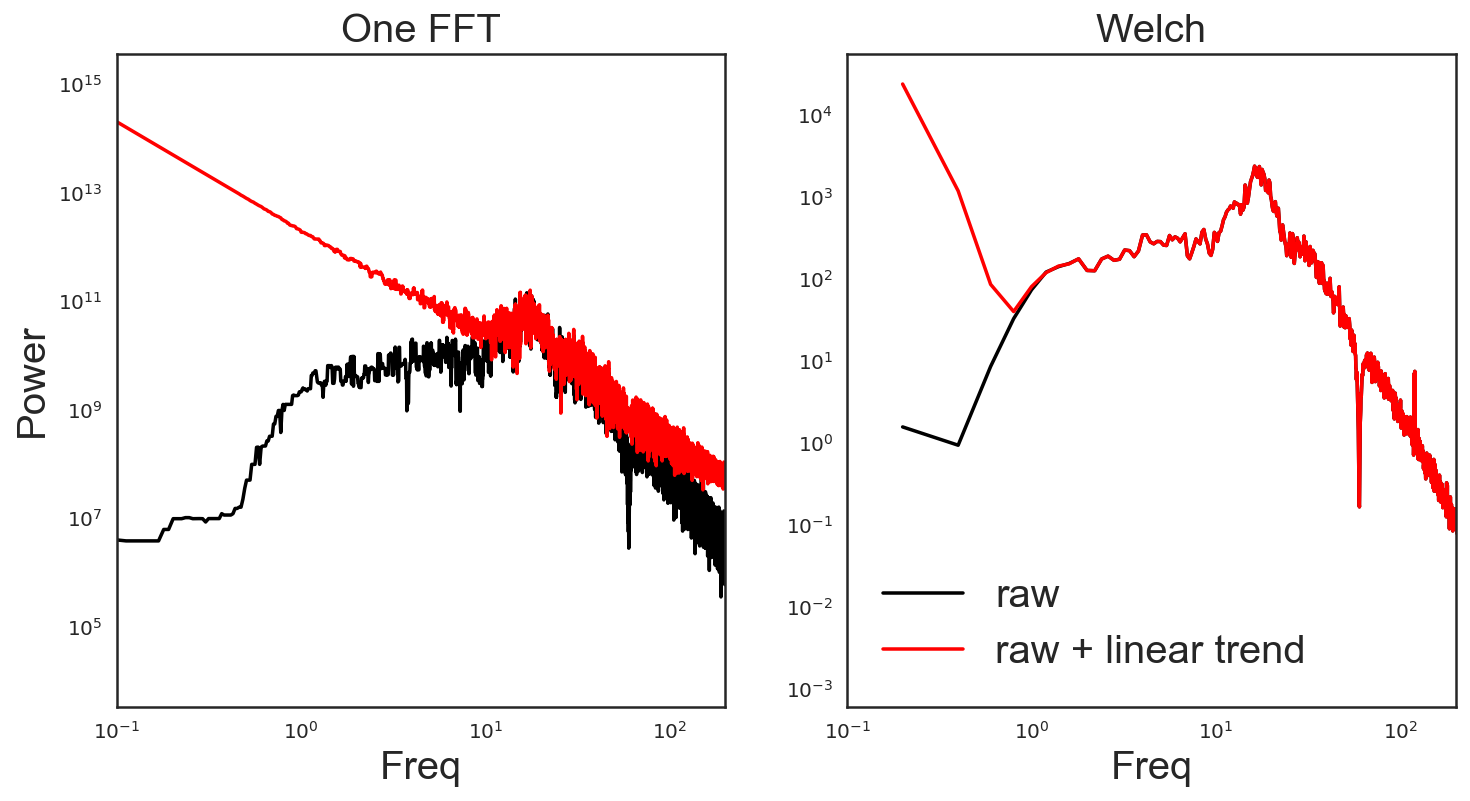

In [5]:
# Add linear trend to data
x2 = x + .1*np.arange(len(x))

# Calculate both power spectra with single Fourier Transform (median filter the result with window size of 0.1Hz)
f,psd = f_psd(x,Fs=Fs,method='fftmed', Hzmed = .1)
f2,psd2 = f_psd(x2,Fs=Fs,method='fftmed', Hzmed = .1)

# Calculate both power spectra using Welch's method, Window size = 5 sec
f3,psd3 = f_psd(x,Fs=Fs,method='welch',welch_params={'nperseg':5000})
f4,psd4 = f_psd(x2,Fs=Fs,method='welch',welch_params={'nperseg':5000})

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.loglog(f,psd,'k',label='raw')
plt.loglog(f2,psd2,'r',label='raw + linear trend')
plt.xlim((.1,200))
plt.title('One FFT',size=20)
plt.xlabel('Freq',size=20)
plt.ylabel('Power',size=20)

plt.subplot(1,2,2)
plt.loglog(f3,psd3,'k',label='raw')
plt.loglog(f4,psd4,'r',label='raw + linear trend')
plt.xlim((.1,200))
plt.title('Welch',size=20)
plt.xlabel('Freq',size=20)
plt.legend(loc='best',fontsize=20)